In [65]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as st

t_data = np.loadtxt('timedata.dat')
x_data = np.loadtxt('data.dat')

mpl.rcParams.update({'font.size':10})


(5, 1000000)
-0.012872582334092617 0.08450740468259754 0.0225888588287645
0.14947689373311235 0.05609035371237608 0.130844310508
0.007831925975682101 0.03764737906759052 0.0050969802823724
0.000725703294103028 0.00023641258066301967 0.000619885165630939
0.17799765832939315 0.03661682710482182 0.19572655173283


/tmp/ipykernel_6422/3869841106.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots(1, figsize=(3,3))


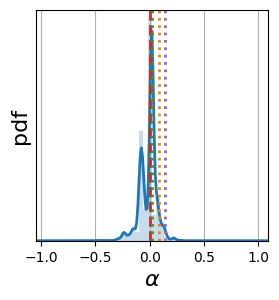

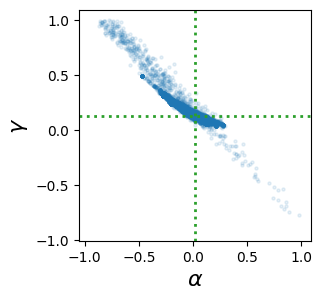

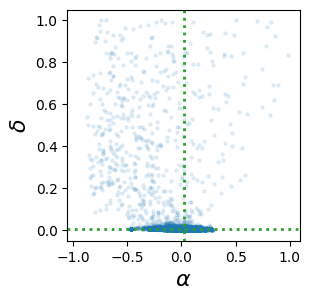

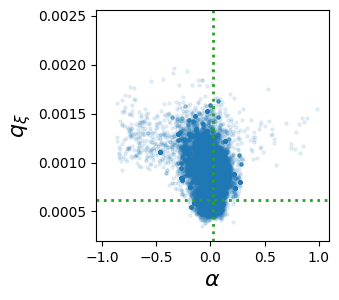

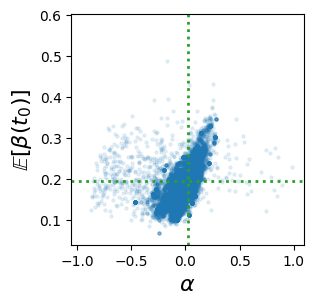

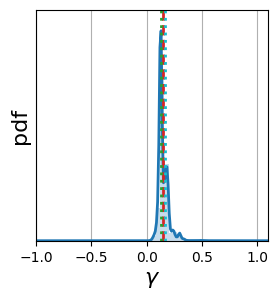

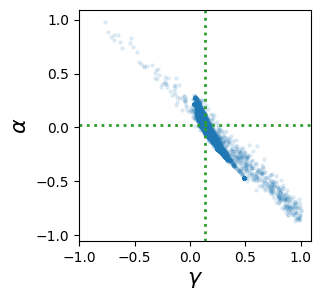

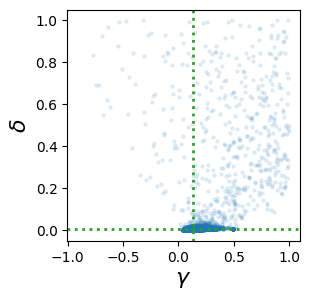

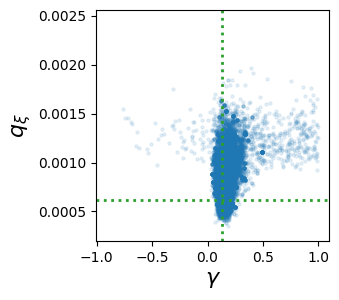

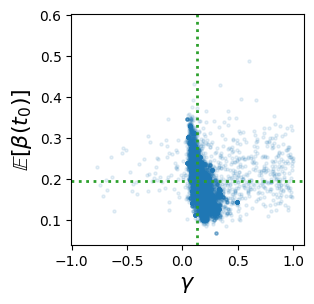

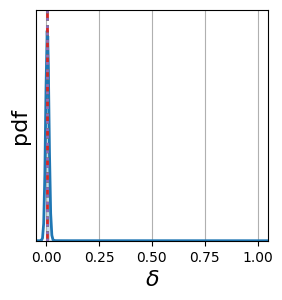

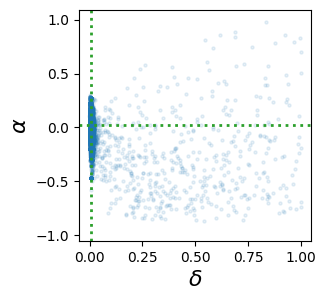

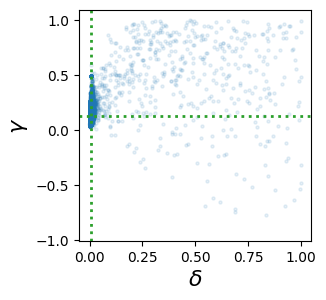

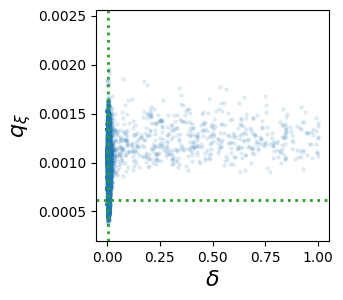

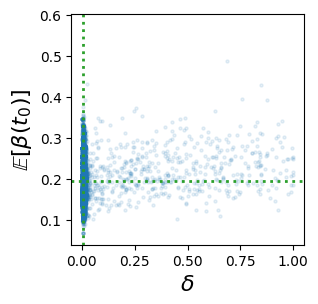

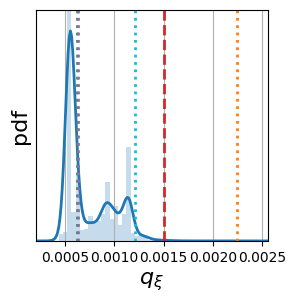

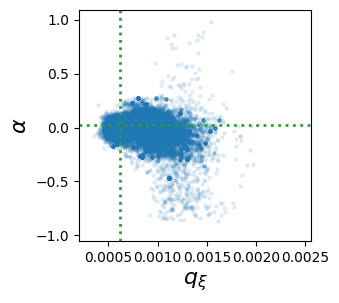

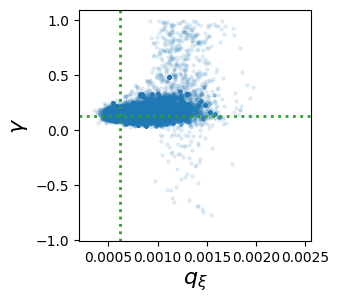

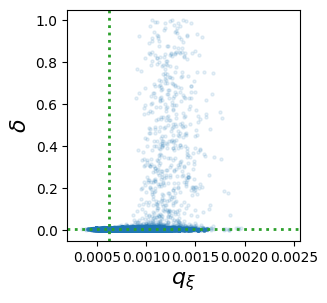

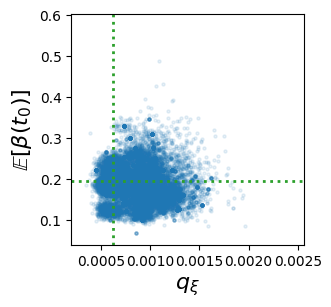

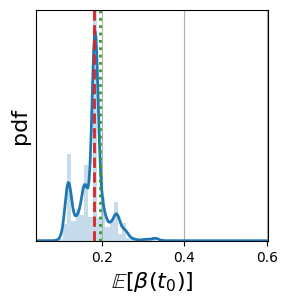

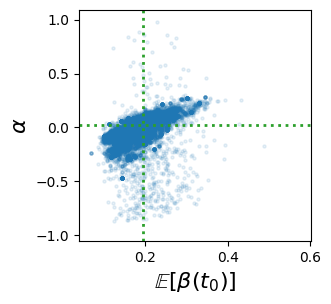

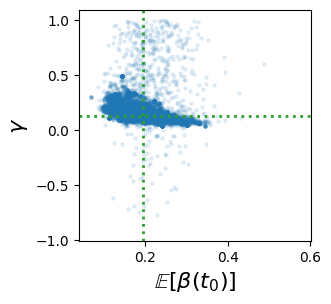

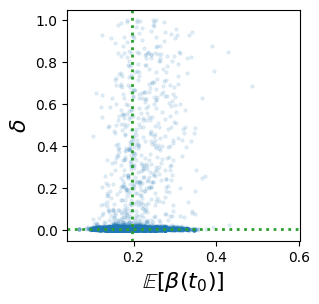

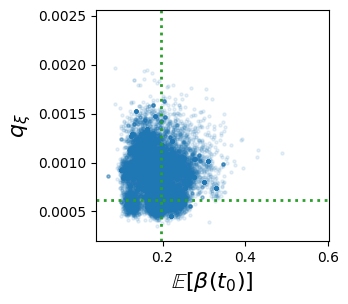

In [66]:
## Model Full
skip = 10

samples = np.loadtxt('chains/ModelSIRS_Full-posterior.dat')
print(samples.shape)
priors = np.loadtxt('chains/ModelSIRS_Full-prior.dat')
maps = np.loadtxt('chains/ModelSIRS_Full-map.dat')
label = [r'$\alpha$',r'$\gamma$',r'$\delta$',r'$q_\xi$',r'$\mathbb{E}[\beta(t_0)]$']
true = [0.0,1/7,1/180,0.0015,0.18]
Npar = len(samples[:,0])


maps1 = np.loadtxt('chains/ModelSIRS_SIR-map.dat')
maps2 = np.loadtxt('chains/ModelSIRS_SIS-map.dat')
maps3 = np.loadtxt('chains/ModelSIRS_SIRS-map.dat')

find_map = 0
if find_map == 1:
  from scipy.optimize import minimize
  kde = st.gaussian_kde(samples)
  def kde_fun(x):
    return -kde(x)
  res = minimize(kde_fun,true, method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
  # print(res.x)
  maps = res.x
  # np.savetxt('chains/ModelSIRS_SIS-map.dat',maps)

for ii in range(len(samples[:,0])):
  xmin,xmax = np.min(samples[ii,:]), np.max(samples[ii,:])
  # if param_true[ii] < xmin:
  #   xmin = param_true[ii]
  # elif  param_true[ii] > xmax:
  #   xmax = param_true[ii]

  print(np.mean(samples[ii,:]),np.std(samples[ii,:]),maps[ii])

  # x_low, x_up = np.percentile(samples[ii,:], 1, axis=0), np.percentile(samples[ii,:], 99, axis=0)

  xmean = (xmin + xmax)/2
  xrang = (xmax - xmin)
  x_low = np.max([xmean-0.55*xrang])
  x_up = np.min([xmean+0.55*xrang])

  f, ax = plt.subplots(1, figsize=(3,3))
  Xpdf = st.gaussian_kde(samples[ii,:],bw_method = 0.2)
  # print(Xpdf.silverman_factor())
  # Xgrd = np.linspace(np.min(samples[ii,:]),np.max(samples[ii,:]))
  Xgrd = np.linspace(x_low,x_up,201)
  pdfmax = max(Xpdf(Xgrd))
  plt.plot(Xgrd,Xpdf(Xgrd),color='tab:blue',linewidth=2)
  plt.hist(samples[ii,:],bins=50,density=True,alpha=0.25)
  plt.plot([true[ii],true[ii]],[0,1.1*pdfmax],c='tab:red',linewidth=2,linestyle='--')
  plt.plot([maps[ii],maps[ii]],[0,1.1*pdfmax],c='tab:green',linewidth=2,linestyle=':')
  
  if ii  == 0:
    plt.plot([maps1[0],maps1[0]],[0,1.1*pdfmax],c='tab:orange',linewidth=2,linestyle=':')
    plt.plot([maps3[0],maps3[0]],[0,1.1*pdfmax],c='tab:purple',linewidth=2,linestyle=':')

  if ii  == 1:
    plt.plot([maps2[0],maps2[0]],[0,1.1*pdfmax],c='tab:cyan',linewidth=2,linestyle=':')

  if ii  == 2:
    plt.plot([maps3[1],maps3[1]],[0,1.1*pdfmax],c='tab:purple',linewidth=2,linestyle=':')

  if ii  == 3:
    plt.plot([maps1[1],maps1[1]],[0,1.1*pdfmax],c='tab:orange',linewidth=2,linestyle=':')
    plt.plot([maps2[1],maps2[1]],[0,1.1*pdfmax],c='tab:cyan',linewidth=2,linestyle=':')
    plt.plot([maps3[2],maps3[2]],[0,1.1*pdfmax],c='tab:purple',linewidth=2,linestyle=':')

  # plt.hist(samples[ii,:], bins=50, density=True,alpha=0.5)
  # plt.hist(samples[ii,::skip],density=True,bins=50,alpha=0.5)
  # plt.hist(priors[ii,:],density=True,bins=50,alpha=0.5)
  myYlim = [0.0, 1.1*pdfmax]
  plt.ylabel('pdf', fontsize=16)
  plt.xlabel(label[ii], fontsize=16)
  plt.ylim(myYlim)
  plt.xlim([x_low,x_up])
  plt.yticks([])
  plt.grid(True)
  # plt.savefig('figures/mFull_mpdf_'+ str(ii)+'.pdf',bbox_inches='tight')
  # plt.close()

  for jj in range(Npar):
   if ii != jj:
      ymin,ymax = np.min(samples[jj,:]), np.max(samples[jj,:])
      ymean = (ymin + ymax)/2
      yrang = (ymax - ymin)
      y_low = np.max([ymean-0.55*yrang])
      y_up = np.min([ymean+0.55*yrang])

      f, ax = plt.subplots(1, figsize=(3,3))
      plt.scatter(samples[ii,::skip],samples[jj,::skip],alpha=0.1,s=5)
      plt.plot([x_low,x_up],[maps[jj],maps[jj]],c='tab:green',linewidth=2,linestyle=':')
      plt.plot([maps[ii],maps[ii]],[y_low,y_up],c='tab:green',linewidth=2,linestyle=':')
      # plt.plot([x_low,x_up],[true[jj],true[jj]],c='tab:red',linewidth=2,linestyle='--')
      # plt.plot([true[ii],true[ii]],[y_low,y_up],c='tab:red',linewidth=2,linestyle='--')
      plt.xlim([x_low,x_up])
      plt.ylim([y_low,y_up])
      plt.xlabel(label[ii],fontsize=16)
      plt.ylabel(label[jj],fontsize=16)
      # plt.savefig('figures/mFull_jpdf_'+ str(ii)+str(jj)+'.pdf',bbox_inches='tight')
      # plt.close()

(4, 50000)
0.14282394241823615 0.010812706638549286 0.142201923928142
0.00622657232899651 0.003373727186705265 0.00535467670998466
0.0007734880400556919 0.00016423416254816313 0.000629394226009466
0.18539672166801494 0.026975463710302565 0.185915579569997


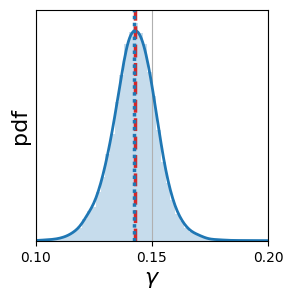

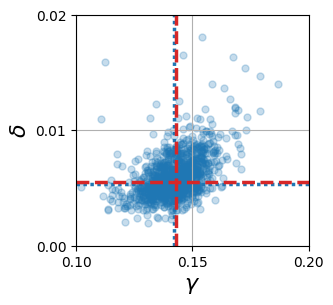

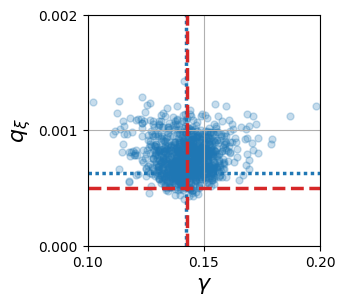

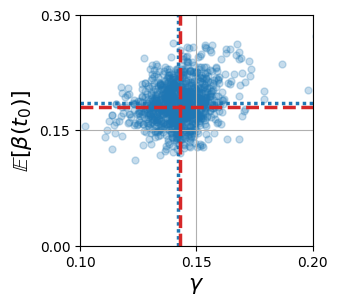

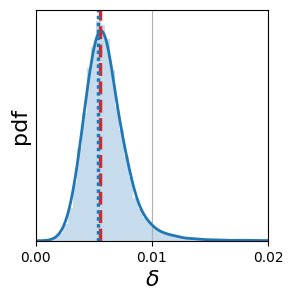

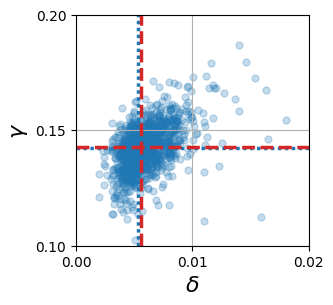

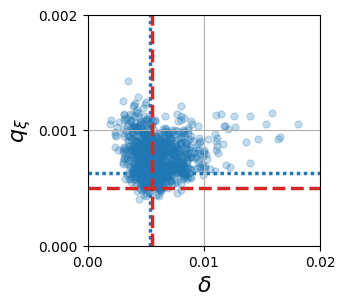

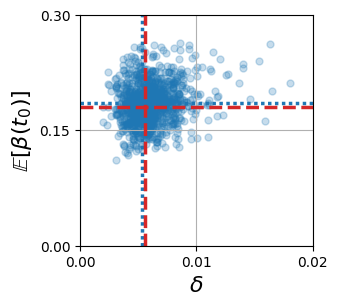

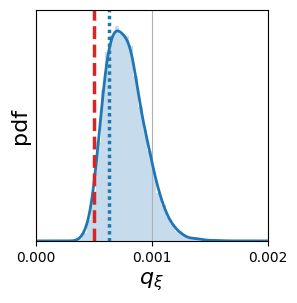

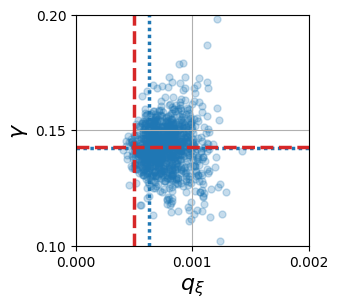

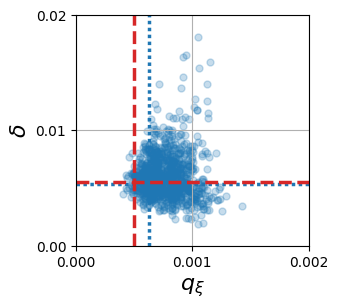

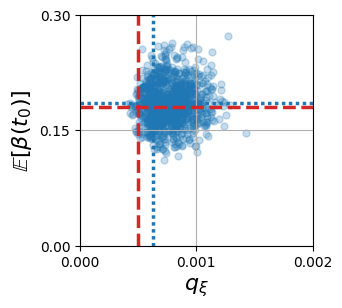

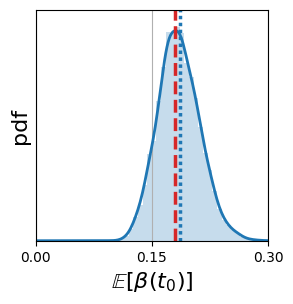

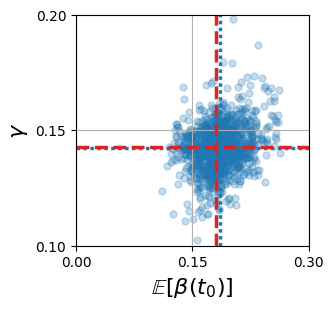

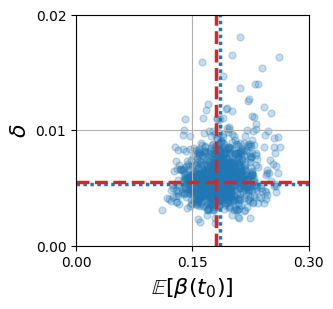

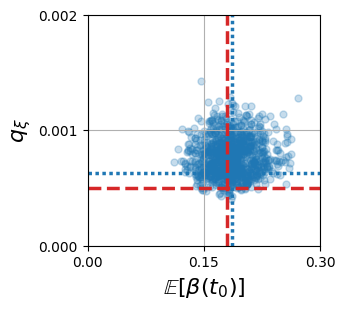

In [67]:
## Model SIRS
skip = 50

samples = np.loadtxt('chains/ModelSIRS_SIRS-posterior.dat')
print(samples.shape)
priors = np.loadtxt('chains/ModelSIRS_SIRS-prior.dat')
maps = np.loadtxt('chains/ModelSIRS_SIRS-map.dat')
label = [r'$\gamma$',r'$\delta$',r'$q_\xi$',r'$\mathbb{E}[\beta(t_0)]$']
true = [1/7,1/180,0.0005,0.18]
Npar = len(samples[:,0])

# from scipy.optimize import minimize
# kde = st.gaussian_kde(samples[:,::skip])
# def kde_fun(x):
#   return -kde(x)
# res = minimize(kde_fun,[1/7,1/180,0.0015,0.18], method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
# maps = res.x
# np.savetxt('chains/ModelSIRS_SIRS-map.dat',maps)
# print(maps)
# print(true)


xlow = [0.1,0,0,0]
xup = [0.2,0.02,0.002,0.3]

for ii in range(len(samples[:,0])):
  xmin,xmax = np.min(samples[ii,::skip]), np.max(samples[ii,::skip])
  # if param_true[ii] < xmin:
  #   xmin = param_true[ii]
  # elif  param_true[ii] > xmax:
  #   xmax = param_true[ii]

  print(np.mean(samples[ii,::skip]),np.std(samples[ii,::skip]),maps[ii])

  # xmean = (xmin + xmax)/2
  # xrang = (xmax - xmin)
  # x_low = np.max([xmean-0.55*xrang,0])
  # x_up = np.min([xmean+0.55*xrang,1])

  x_low, x_up = xlow[ii],xup[ii]

  f, ax = plt.subplots(1, figsize=(3,3))
  Xpdf = st.gaussian_kde(samples[ii,:],bw_method = 0.2)
  Xprior = st.gaussian_kde(priors[ii,:],bw_method = 0.2)
  # print(Xpdf.silverman_factor())
  # Xgrd = np.linspace(np.min(samples[ii,:]),np.max(samples[ii,:]))
  Xgrd = np.linspace(x_low,x_up,201)
  pdfmax = max(Xpdf(Xgrd))
  plt.plot(Xgrd,Xpdf(Xgrd),color='tab:blue',linewidth=2)
  plt.hist(samples[ii,:],range=(x_low,x_up),bins=50,density=True,alpha=0.25)
  plt.plot([true[ii],true[ii]],[0,1.1*pdfmax],c='tab:red',linewidth=2.5,linestyle='--')
  plt.plot([maps[ii],maps[ii]],[0,1.1*pdfmax],c='tab:blue',linewidth=2.5,linestyle=(0, (1, 1)))
  # plt.hist(samples[ii,:], bins=50, density=True,alpha=0.5)
  # plt.hist(samples[ii,::skip],density=True,bins=50,alpha=0.5)
  # plt.plot(Xgrd,Xprior(Xgrd),color='tab:orange',linewidth=2)
  # plt.hist(priors[ii,:],density=True,bins=50,alpha=0.5)
  myYlim = [0.0, 1.1*pdfmax]
  plt.ylabel('pdf', fontsize=16)
  plt.xlabel(label[ii], fontsize=16)
  plt.ylim(myYlim)
  plt.xlim([x_low,x_up])
  plt.xticks([x_low,(x_low+x_up)/2,x_up])
  plt.yticks([])
  plt.grid(True)
  plt.savefig('figures/mSIRS_mpdf_'+ str(ii)+'.pdf',bbox_inches='tight')
  # plt.close()

  for jj in range(Npar):
   if ii != jj:
      ymin,ymax = np.min(samples[jj,::skip]), np.max(samples[jj,::skip])
      # ymean = (ymin + ymax)/2
      # yrang = (ymax - ymin)
      # y_low = np.max([ymean-0.55*yrang,0])
      # y_up = np.min([ymean+0.55*yrang,1])

      y_low = xlow[jj]
      y_up = xup[jj]

      f, ax = plt.subplots(1, figsize=(3,3))
      plt.scatter(samples[ii,::skip],samples[jj,::skip],alpha=0.25,s=25)
      plt.plot([x_low,x_up],[maps[jj],maps[jj]],c='tab:blue',linewidth=2.5,linestyle=(0, (1, 1)))
      plt.plot([maps[ii],maps[ii]],[y_low,y_up],c='tab:blue',linewidth=2.5,linestyle=(0, (1, 1)))
      plt.plot([x_low,x_up],[true[jj],true[jj]],c='tab:red',linewidth=2.5,linestyle='--')
      plt.plot([true[ii],true[ii]],[y_low,y_up],c='tab:red',linewidth=2.5,linestyle='--')
      plt.xlim([x_low,x_up])
      plt.ylim([y_low,y_up])
      plt.xticks([x_low,(x_low+x_up)/2,x_up])
      plt.yticks([y_low,(y_low+y_up)/2,y_up])
      plt.grid(True)
      plt.xlabel(label[ii],fontsize=16)
      plt.ylabel(label[jj],fontsize=16)
      plt.savefig('figures/mSIRS_jpdf_'+ str(ii)+str(jj)+'.pdf',bbox_inches='tight')
      # plt.close()


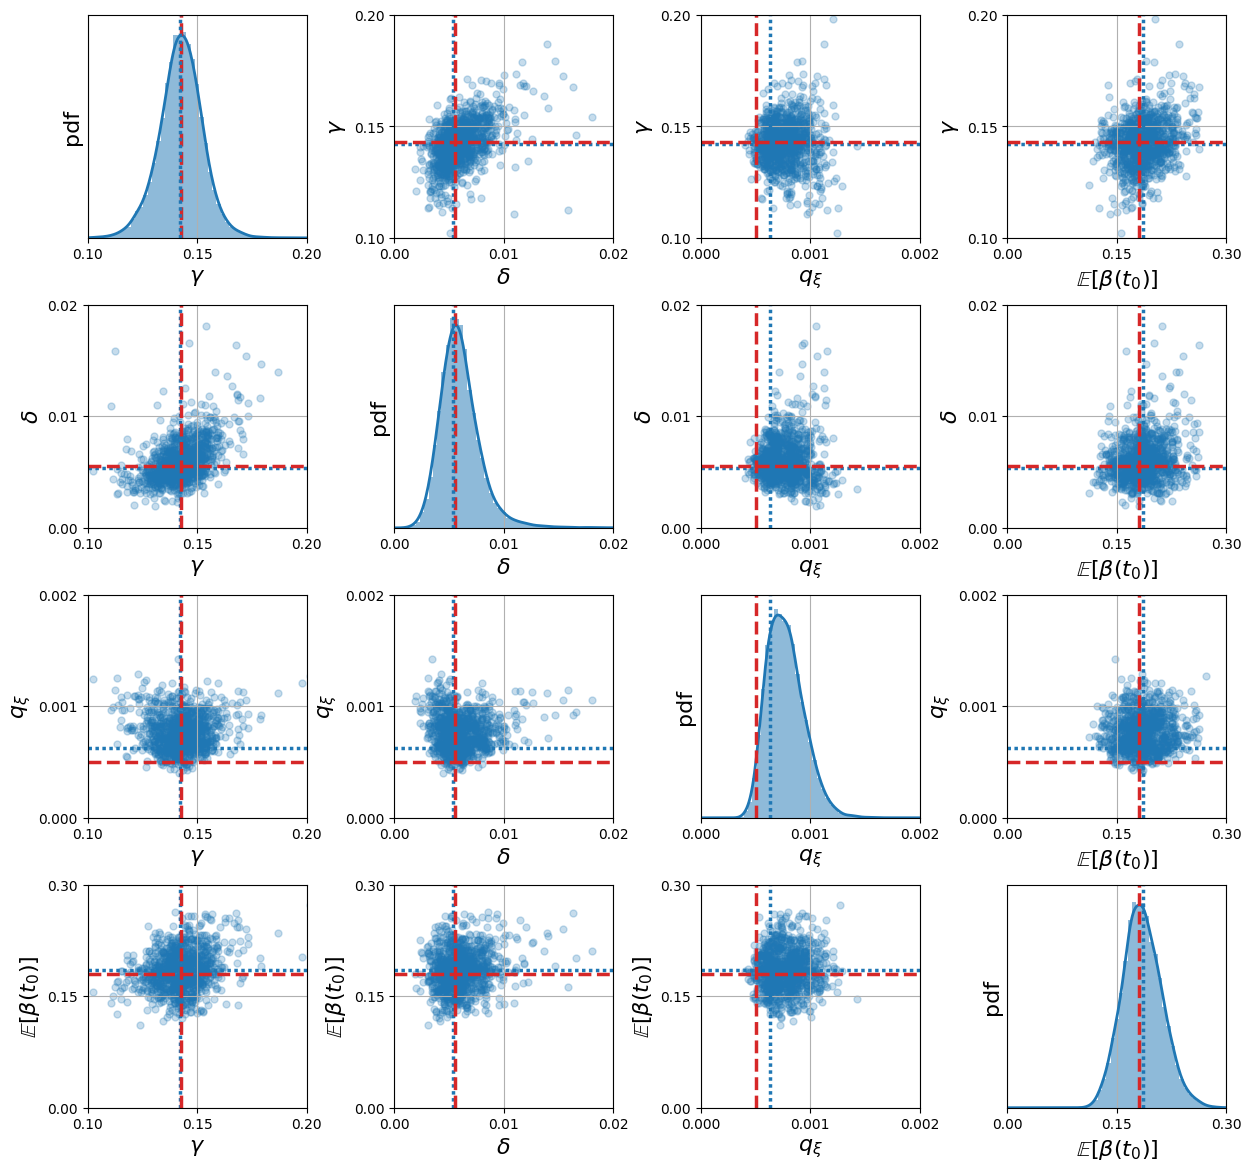

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(12.16,11.52)) #width, height (11.4,10.8)
fig.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.4) #spacing between rows, spacing between columns

fig_count = [0,4,8,12,1,5,9,13,2,6,10,14,3,7,11,15]

count = 0
for ii in range(4):
    x_low, x_up = xlow[ii],xup[ii]
    for jj in range(4):
        ax = axes.flat[fig_count[count]]
        y_low, y_up = xlow[jj], xup[jj]
        if ii == jj:
                    
          binwidth = (xup[ii] - xlow[ii])/51

          Xpdf = st.gaussian_kde(samples[ii,:],bw_method = 0.2)
          Xgrd = np.linspace(x_low,x_up,201)
          pdfmax = max(Xpdf(Xgrd))
          ax.plot(Xgrd,Xpdf(Xgrd),color='tab:blue',linewidth=2)
          ax.plot([true[ii],true[ii]],[0,1.1*pdfmax],c='tab:red',linewidth=2.5,linestyle='--')
          ax.plot([maps[ii],maps[ii]],[0,1.1*pdfmax],c='tab:blue',linewidth=2.5,linestyle=(0, (1, 1)))
          ax.hist(samples[ii,:], bins=np.arange(xlow[ii], xup[ii] + binwidth, binwidth), density=True,alpha=0.5)
          myYlim = [0.0, 1.1*pdfmax]
          ax.set_ylabel('pdf', fontsize=16)
          ax.set_xlabel(label[ii], fontsize=16)
          ax.set_ylim(myYlim)
          ax.set_xlim([x_low,x_up])
          ax.set_xticks([x_low,(x_low+x_up)/2,x_up])
          ax.set_yticks([])
          ax.grid(True)
        
        else:
          ax.scatter(samples[ii,::skip],samples[jj,::skip],alpha=0.25,s=25)
          ax.plot([x_low,x_up],[maps[jj],maps[jj]],c='tab:blue',linewidth=2.5,linestyle=(0, (1, 1)))
          ax.plot([maps[ii],maps[ii]],[y_low,y_up],c='tab:blue',linewidth=2.5,linestyle=(0, (1, 1)))
          ax.plot([x_low,x_up],[true[jj],true[jj]],c='tab:red',linewidth=2.5,linestyle='--')
          ax.plot([true[ii],true[ii]],[y_low,y_up],c='tab:red',linewidth=2.5,linestyle='--')
          ax.set_xlim([x_low,x_up])
          ax.set_ylim([y_low,y_up])
          ax.set_xticks([x_low,(x_low+x_up)/2,x_up])
          ax.set_yticks([y_low,(y_low+y_up)/2,y_up])
          ax.grid(True)
          ax.set_xlabel(label[ii],fontsize=16)
          ax.set_ylabel(label[jj],fontsize=16)

        count+=1

plt.savefig('figures/SIRS_pdfs.pdf',bbox_inches='tight')


(3, 20000)
Optimization terminated successfully.
         Current function value: -244241.507655
         Iterations: 120
         Function evaluations: 218
0.19136566815669098 0.06670458766384829 0.1656984541954466
0.0012396574613211574 0.00016179984445604883 0.0012130743302548458
0.2281146254512356 0.06085612741699164 0.20385133049533238


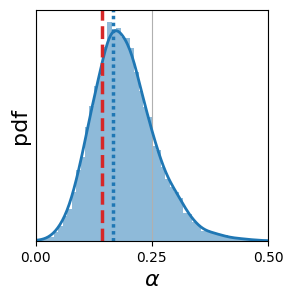

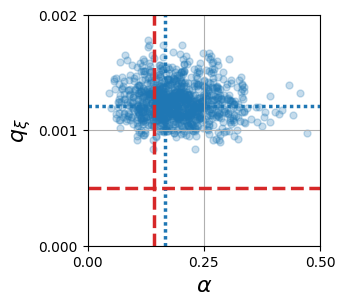

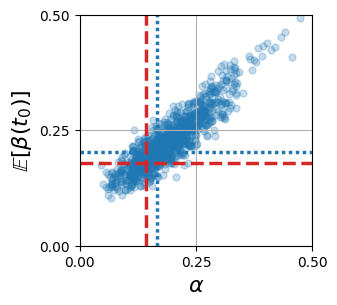

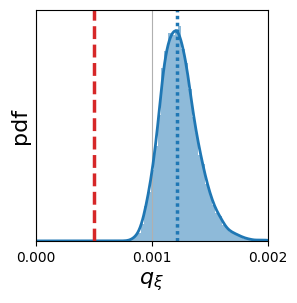

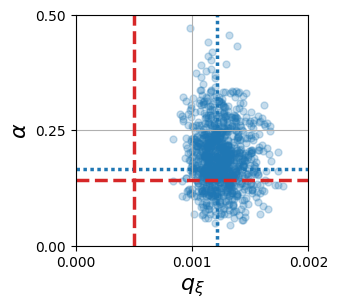

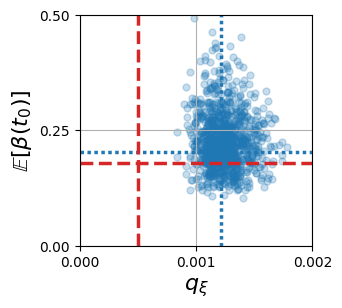

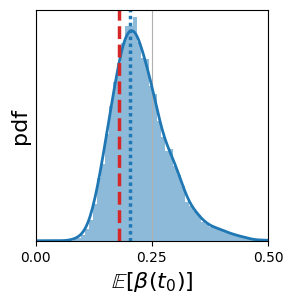

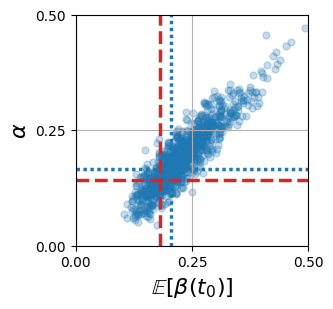

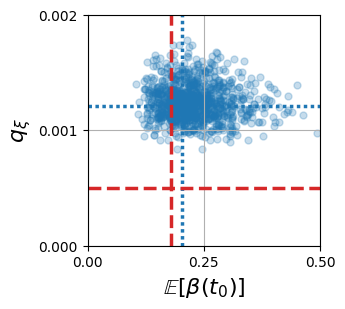

In [69]:
## Model SIS
skip = 20

samples = np.loadtxt('chains/ModelSIRS_SIS-posterior.dat')
print(samples.shape)
priors = np.loadtxt('chains/ModelSIRS_SIS-prior.dat')
maps = np.loadtxt('chains/ModelSIRS_SIS-map.dat')
label = [r'$\alpha$',r'$q_\xi$',r'$\mathbb{E}[\beta(t_0)]$']
true = [1/7,0.0005,0.18]
Npar = len(samples[:,0])

from scipy.optimize import minimize
kde = st.gaussian_kde(samples)
def kde_fun(x):
  return -kde(x)
res = minimize(kde_fun,true, method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
# print(res.x)
maps = res.x
# np.savetxt('chains/ModelSIRS_SIS-map.dat',maps)


xlow = [0,0,0]
xup = [0.5,0.002,0.5]

for ii in range(len(samples[:,0])):
  xmin,xmax = np.min(samples[ii,:]), np.max(samples[ii,:])
  # if param_true[ii] < xmin:
  #   xmin = param_true[ii]
  # elif  param_true[ii] > xmax:
  #   xmax = param_true[ii]

  print(np.mean(samples[ii,:]),np.std(samples[ii,:]),maps[ii])

  # xmean = (xmin + xmax)/2
  # xrang = (xmax - xmin)
  # x_low = np.max([xmean-0.55*xrang,0])
  # x_up = np.min([xmean+0.55*xrang])


  x_low, x_up = xlow[ii],xup[ii]

  f, ax = plt.subplots(1, figsize=(3,3))
  Xpdf = st.gaussian_kde(samples[ii,:],bw_method = 0.2)
  # print(Xpdf.silverman_factor())
  # Xgrd = np.linspace(np.min(samples[ii,:]),np.max(samples[ii,:]))
  Xgrd = np.linspace(x_low,x_up,201)
  pdfmax = max(Xpdf(Xgrd))
  plt.plot(Xgrd,Xpdf(Xgrd),color='tab:blue',linewidth=2)
  # plt.hist(samples[ii,:],bins=50,density=True,alpha=0.25)
  plt.plot([true[ii],true[ii]],[0,1.1*pdfmax],c='tab:red',linewidth=2.5,linestyle='--')
  plt.plot([maps[ii],maps[ii]],[0,1.1*pdfmax],c='tab:blue',linewidth=2.5,linestyle=(0, (1, 1)))
  plt.hist(samples[ii,:], bins=50, density=True,alpha=0.5)
  # plt.hist(samples[ii,::skip],density=True,bins=50,alpha=0.5)
  # plt.hist(priors[ii,:],density=True,bins=50,alpha=0.5)
  myYlim = [0.0, 1.1*pdfmax]
  plt.ylabel('pdf', fontsize=16)
  plt.xlabel(label[ii], fontsize=16)
  plt.ylim(myYlim)
  plt.xlim([x_low,x_up])
  plt.xticks([x_low,(x_low+x_up)/2,x_up])
  plt.yticks([])
  plt.grid(True)
  plt.savefig('figures/mSIS_mpdf_'+ str(ii)+'.pdf',bbox_inches='tight')
  # plt.close()

  for jj in range(Npar):
   if ii != jj:
      # ymin,ymax = np.min(samples[jj,:]), np.max(samples[jj,:])
      # ymean = (ymin + ymax)/2
      # yrang = (ymax - ymin)
      # y_low = np.max([ymean-0.55*yrang,0])
      # y_up = np.min([ymean+0.55*yrang])

      y_low, y_up = xlow[jj], xup[jj]

      f, ax = plt.subplots(1, figsize=(3,3))
      plt.scatter(samples[ii,::skip],samples[jj,::skip],alpha=0.25,s=25)
      plt.plot([x_low,x_up],[maps[jj],maps[jj]],c='tab:blue',linewidth=2.5,linestyle=(0, (1, 1)))
      plt.plot([maps[ii],maps[ii]],[y_low,y_up],c='tab:blue',linewidth=2.5,linestyle=(0, (1, 1)))
      plt.plot([x_low,x_up],[true[jj],true[jj]],c='tab:red',linewidth=2.5,linestyle='--')
      plt.plot([true[ii],true[ii]],[y_low,y_up],c='tab:red',linewidth=2.5,linestyle='--')
      plt.xlim([x_low,x_up])
      plt.ylim([y_low,y_up])
      plt.xticks([x_low,(x_low+x_up)/2,x_up])
      plt.yticks([y_low,(y_low+y_up)/2,y_up])
      plt.grid(True)
      plt.xlabel(label[ii],fontsize=16)
      plt.ylabel(label[jj],fontsize=16)
      plt.savefig('figures/mSIS_jpdf_'+ str(ii)+str(jj)+'.pdf',bbox_inches='tight')
      # plt.close()


# for ii in range(len(samples[:,0])):
#   f, ax = plt.subplots(1, figsize=(3,3))
#   plt.hist(priors[ii,:], bins=50, density=True,alpha=0.5)
#   plt.autoscale(enable=True, axis='x', tight=True)
#   plt.ylabel('prior pdf', fontsize=16)
#   plt.xlabel(label[ii], fontsize=16)

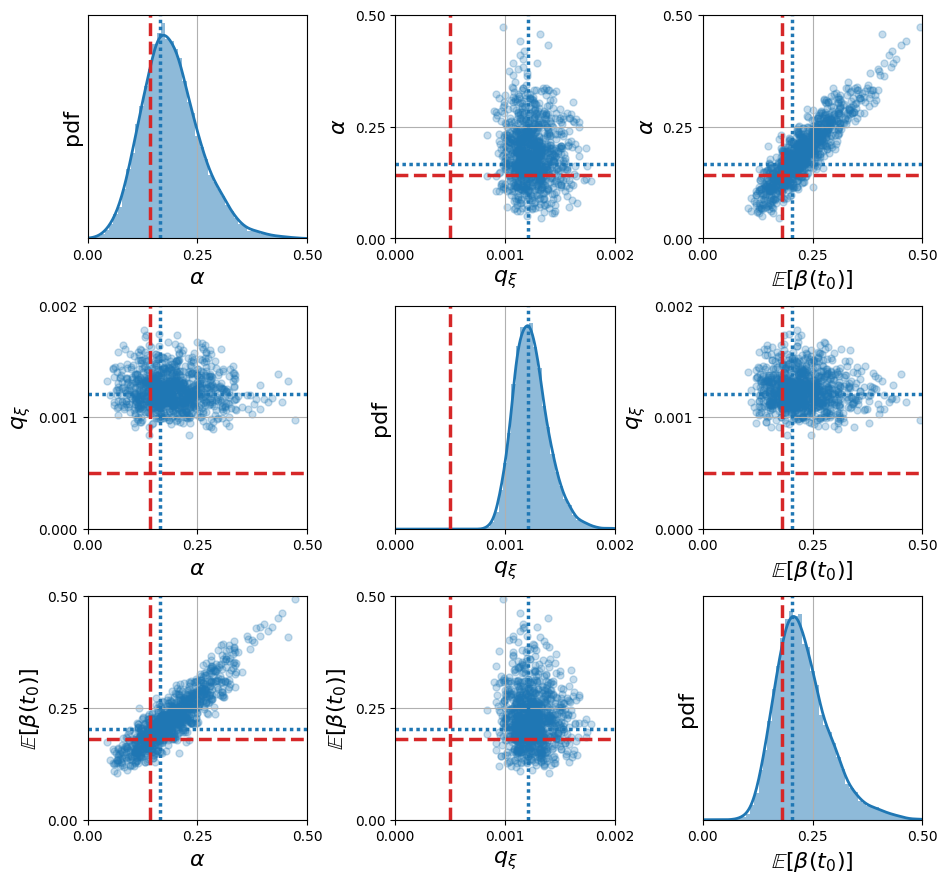

In [70]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(9.12,8.64)) #width, height (11.4,10.8)
fig.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.4) #spacing between rows, spacing between columns

fig_count = [0,3,6,1,4,7,2,5,8]

count = 0
for ii in range(3):
    x_low, x_up = xlow[ii],xup[ii]
    for jj in range(3):
        ax = axes.flat[fig_count[count]]
        y_low, y_up = xlow[jj], xup[jj]
        if ii == jj:
                    
          binwidth = (xup[ii] - xlow[ii])/51
          Xpdf = st.gaussian_kde(samples[ii,:],bw_method = 0.2)
          Xgrd = np.linspace(x_low,x_up,201)
          pdfmax = max(Xpdf(Xgrd))
          ax.plot(Xgrd,Xpdf(Xgrd),color='tab:blue',linewidth=2)
          ax.plot([true[ii],true[ii]],[0,1.1*pdfmax],c='tab:red',linewidth=2.5,linestyle='--')
          ax.plot([maps[ii],maps[ii]],[0,1.1*pdfmax],c='tab:blue',linewidth=2.5,linestyle=(0, (1, 1)))
          ax.hist(samples[ii,:], bins=np.arange(xlow[ii], xup[ii] + binwidth, binwidth), density=True,alpha=0.5)
          myYlim = [0.0, 1.1*pdfmax]
          ax.set_ylabel('pdf', fontsize=16)
          ax.set_xlabel(label[ii], fontsize=16)
          ax.set_ylim(myYlim)
          ax.set_xlim([x_low,x_up])
          ax.set_xticks([x_low,(x_low+x_up)/2,x_up])
          ax.set_yticks([])
          ax.grid(True)
        
        else:
          ax.scatter(samples[ii,::skip],samples[jj,::skip],alpha=0.25,s=25)
          ax.plot([x_low,x_up],[maps[jj],maps[jj]],c='tab:blue',linewidth=2.5,linestyle=(0, (1, 1)))
          ax.plot([maps[ii],maps[ii]],[y_low,y_up],c='tab:blue',linewidth=2.5,linestyle=(0, (1, 1)))
          ax.plot([x_low,x_up],[true[jj],true[jj]],c='tab:red',linewidth=2.5,linestyle='--')
          ax.plot([true[ii],true[ii]],[y_low,y_up],c='tab:red',linewidth=2.5,linestyle='--')
          ax.set_xlim([x_low,x_up])
          ax.set_ylim([y_low,y_up])
          ax.set_xticks([x_low,(x_low+x_up)/2,x_up])
          ax.set_yticks([y_low,(y_low+y_up)/2,y_up])
          ax.grid(True)
          ax.set_xlabel(label[ii],fontsize=16)
          ax.set_ylabel(label[jj],fontsize=16)

        count+=1

plt.savefig('figures/SIS_pdfs.pdf',bbox_inches='tight')


(3, 20000)
Optimization terminated successfully.
         Current function value: -613890.168394
         Iterations: 80
         Function evaluations: 148
0.08582663003134093 0.018419505392836266 0.08729419198252025
0.0022690064509164804 0.00031661630122711647 0.002162335619244173
0.1504181209083818 0.025208766139771785 0.14904385969831388


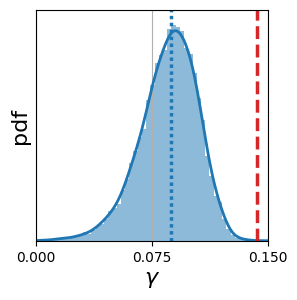

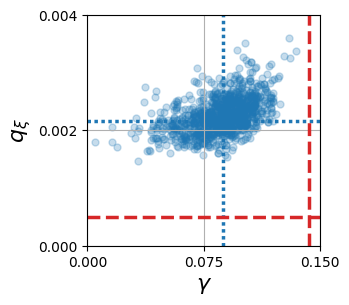

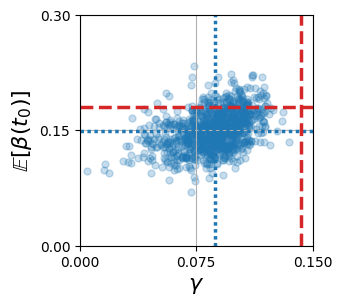

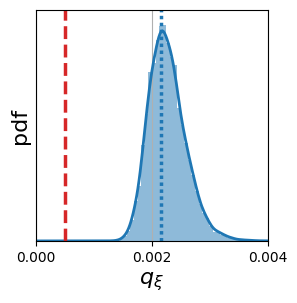

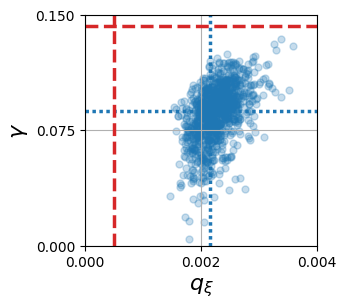

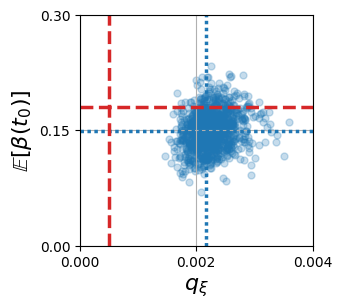

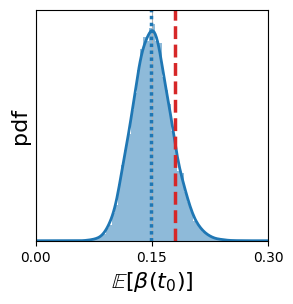

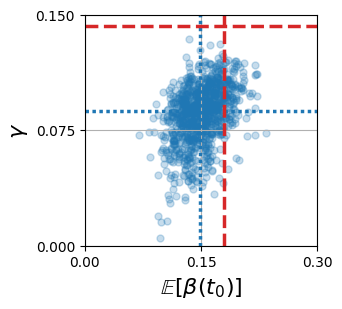

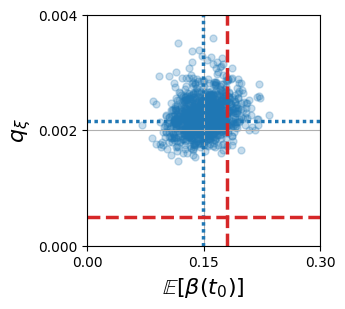

In [71]:
## Model SIR
skip = 20

samples = np.loadtxt('chains/ModelSIRS_SIR-posterior.dat')
print(samples.shape)
priors = np.loadtxt('chains/ModelSIRS_SIR-prior.dat')
maps = np.loadtxt('chains/ModelSIRS_SIR-map.dat')
label = [r'$\gamma$',r'$q_\xi$',r'$\mathbb{E}[\beta(t_0)]$']
true = [1/7,0.0005,0.18]
Npar = len(samples[:,0])

from scipy.optimize import minimize
kde = st.gaussian_kde(samples)
def kde_fun(x):
  return -kde(x)
res = minimize(kde_fun,[0.1,0.002,0.15], method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
# print(res.x)
maps = res.x
# np.savetxt('chains/ModelSIRS_SIR-map.dat',maps)


xlow = [0,0,0]
xup = [0.15,0.004,0.3]

for ii in range(len(samples[:,0])):
  xmin,xmax = np.min(samples[ii,:]), np.max(samples[ii,:])
  # if param_true[ii] < xmin:
  #   xmin = param_true[ii]
  # elif  param_true[ii] > xmax:
  #   xmax = param_true[ii]

  print(np.mean(samples[ii,:]),np.std(samples[ii,:]),maps[ii])

  # xmean = (xmin + xmax)/2
  # xrang = (xmax - xmin)
  # x_low = np.max([xmean-0.55*xrang,0])
  # x_up = np.min([xmean+0.55*xrang,1])

  x_low, x_up = xlow[ii],xup[ii]

  f, ax = plt.subplots(1, figsize=(3,3))
  Xpdf = st.gaussian_kde(samples[ii,:],bw_method = 0.2)
  # print(Xpdf.silverman_factor())
  # Xgrd = np.linspace(np.min(samples[ii,:]),np.max(samples[ii,:]))
  Xgrd = np.linspace(x_low,x_up,201)
  pdfmax = max(Xpdf(Xgrd))
  plt.plot(Xgrd,Xpdf(Xgrd),color='tab:blue',linewidth=2)
  # plt.hist(samples[ii,:],bins=50,density=True,alpha=0.25)
  plt.plot([true[ii],true[ii]],[0,1.1*pdfmax],c='tab:red',linewidth=2.5,linestyle='--')
  plt.plot([maps[ii],maps[ii]],[0,1.1*pdfmax],c='tab:blue',linewidth=2.5,linestyle=(0, (1, 1)))
  plt.hist(samples[ii,:], bins=50, density=True,alpha=0.5)
  # plt.hist(samples[ii,::skip],density=True,bins=50,alpha=0.5)
  # plt.hist(priors[ii,:],density=True,bins=50,alpha=0.5)
  myYlim = [0.0, 1.1*pdfmax]
  plt.ylabel('pdf', fontsize=16)
  plt.xlabel(label[ii], fontsize=16)
  plt.ylim(myYlim)
  plt.xlim([x_low,x_up])
  plt.xticks([x_low,(x_low+x_up)/2,x_up])
  plt.yticks([])
  plt.grid(True)
  plt.savefig('figures/mSIR_mpdf_'+ str(ii)+'.pdf',bbox_inches='tight')
  # plt.close()

  for jj in range(Npar):
   if ii != jj:
      # ymin,ymax = np.min(samples[jj,:]), np.max(samples[jj,:])
      # ymean = (ymin + ymax)/2
      # yrang = (ymax - ymin)
      # y_low = np.max([ymean-0.55*yrang,0])
      # y_up = np.min([ymean+0.55*yrang,1])
      
      y_low, y_up = xlow[jj], xup[jj]

      f, ax = plt.subplots(1, figsize=(3,3))
      plt.scatter(samples[ii,::skip],samples[jj,::skip],alpha=0.25,s=25)
      plt.plot([x_low,x_up],[maps[jj],maps[jj]],c='tab:blue',linewidth=2.5,linestyle=(0, (1, 1)))
      plt.plot([maps[ii],maps[ii]],[y_low,y_up],c='tab:blue',linewidth=2.5,linestyle=(0, (1, 1)))
      plt.plot([x_low,x_up],[true[jj],true[jj]],c='tab:red',linewidth=2.5,linestyle='--')
      plt.plot([true[ii],true[ii]],[y_low,y_up],c='tab:red',linewidth=2.5,linestyle='--')
      plt.xlim([x_low,x_up])
      plt.ylim([y_low,y_up])
      plt.xticks([x_low,(x_low+x_up)/2,x_up])
      plt.yticks([y_low,(y_low+y_up)/2,y_up])
      plt.grid(True)
      plt.xlabel(label[ii],fontsize=16)
      plt.ylabel(label[jj],fontsize=16)
      plt.savefig('figures/mSIR_jpdf_'+ str(ii)+str(jj)+'.pdf',bbox_inches='tight')
      # plt.close()


# for ii in range(len(samples[:,0])):
#   f, ax = plt.subplots(1, figsize=(3,3))
#   plt.hist(priors[ii,:], bins=50, density=True,alpha=0.5)
#   plt.autoscale(enable=True, axis='x', tight=True)
#   plt.ylabel('prior pdf', fontsize=12)
#   plt.xlabel(label[ii], fontsize=12)

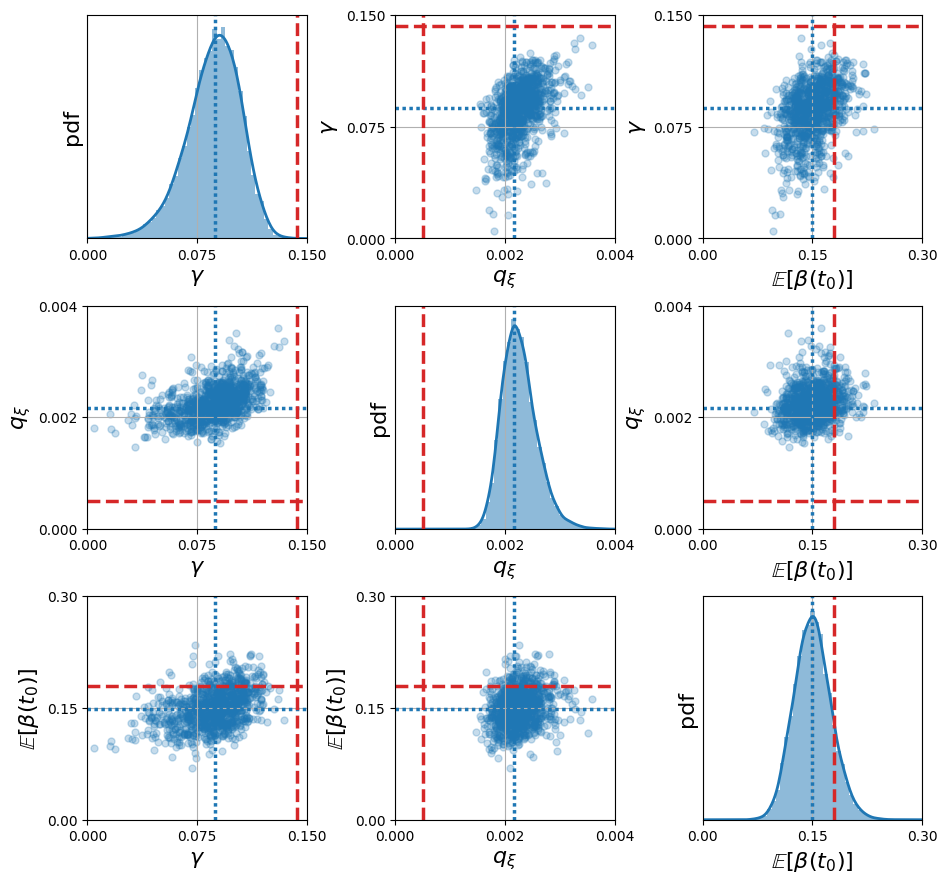

In [72]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(9.12,8.64)) #width, height (11.4,10.8)
fig.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.4) #spacing between rows, spacing between columns

fig_count = [0,3,6,1,4,7,2,5,8]

count = 0
for ii in range(3):
    x_low, x_up = xlow[ii],xup[ii]
    for jj in range(3):
        ax = axes.flat[fig_count[count]]
        y_low, y_up = xlow[jj], xup[jj]
        if ii == jj:
           
          binwidth = (xup[ii] - xlow[ii])/51      
          Xpdf = st.gaussian_kde(samples[ii,:],bw_method = 0.2)
          Xgrd = np.linspace(x_low,x_up,201)
          pdfmax = max(Xpdf(Xgrd))
          ax.plot(Xgrd,Xpdf(Xgrd),color='tab:blue',linewidth=2)
          ax.plot([true[ii],true[ii]],[0,1.1*pdfmax],c='tab:red',linewidth=2.5,linestyle='--')
          ax.plot([maps[ii],maps[ii]],[0,1.1*pdfmax],c='tab:blue',linewidth=2.5,linestyle=(0, (1, 1)))
          ax.hist(samples[ii,:], bins=np.arange(xlow[ii], xup[ii] + binwidth, binwidth), density=True,alpha=0.5)
          myYlim = [0.0, 1.1*pdfmax]
          ax.set_ylabel('pdf', fontsize=16)
          ax.set_xlabel(label[ii], fontsize=16)
          ax.set_ylim(myYlim)
          ax.set_xlim([x_low,x_up])
          ax.set_xticks([x_low,(x_low+x_up)/2,x_up])
          ax.set_yticks([])
          ax.grid(True)
        
        else:
          ax.scatter(samples[ii,::skip],samples[jj,::skip],alpha=0.25,s=25)
          ax.plot([x_low,x_up],[maps[jj],maps[jj]],c='tab:blue',linewidth=2.5,linestyle=(0, (1, 1)))
          ax.plot([maps[ii],maps[ii]],[y_low,y_up],c='tab:blue',linewidth=2.5,linestyle=(0, (1, 1)))
          ax.plot([x_low,x_up],[true[jj],true[jj]],c='tab:red',linewidth=2.5,linestyle='--')
          ax.plot([true[ii],true[ii]],[y_low,y_up],c='tab:red',linewidth=2.5,linestyle='--')
          ax.set_xlim([x_low,x_up])
          ax.set_ylim([y_low,y_up])
          ax.set_xticks([x_low,(x_low+x_up)/2,x_up])
          ax.set_yticks([y_low,(y_low+y_up)/2,y_up])
          ax.grid(True)
          ax.set_xlabel(label[ii],fontsize=16)
          ax.set_ylabel(label[jj],fontsize=16)

        count+=1

plt.savefig('figures/SIR_pdfs.pdf',bbox_inches='tight')
